In [9]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

pd.set_option('display.max_columns', None)

In [8]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5

In [4]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/74/02/5ad29a2a3d193a87d5a05fb7fd3b4e30b8eb6db7a9ddbe193beb7053978f/lightgbm-4.2.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.3 MB 6.9 MB/s eta 0:00:01
   --------------------- ------------------ 0.7/1.3 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 8.5 MB/s eta 0:00:00


In [6]:
!pip install lazypredict

In [2]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 991.0 kB/s eta 0:01:41
   ---------------------------------------- 0.9/99.8 MB 11.2 MB/s eta 0:00:09
    --------------------------------------- 1.5/99.8 MB 11.8 MB/s eta 0:00:09
    --------------------------------------- 1.7/99.8 MB 10.1 MB/s eta 0:00:10
    --------------------------------------- 2.0/99.8 MB 9.2 MB/s eta 0:00:11
    --------------------------------------- 2.3/99.8 MB 8.7 MB/s eta 0:00:12
   - -------------------------------------- 2.5/99.8 MB 8.1 MB/s eta 0:00:12
   - -------------------------------------- 2.5/99.8 MB 8.1 MB/s eta 0:00:12
   - -------------------------------------- 3.2/99.8 MB 7.9 MB/s eta 0:00:13
   - ----------------------

In [11]:
df = pd.read_excel('IBM.xlsx')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,Junior Level,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,Junior Level,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,Entry Level,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,Entry Level,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,40,High,Entry Level,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,41,Very High,Junior Level,Laboratory Technician,Very High,Married,2571,12290,4,No,17,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,42,Medium,Mid Level,Healthcare Representative,Low,Married,9991,21457,4,No,15,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,87,Very High,Junior Level,Manufacturing Director,Medium,Married,6142,5174,1,Yes,20,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,63,Medium,Junior Level,Sales Executive,Medium,Married,5390,13243,2,No,14,Excellent,Very High,0,17,3,Good,9,6,0,8


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [14]:
X_temp = df.copy()
le = LabelEncoder()

for column in X_temp.select_dtypes(include=['object']).columns:
    X_temp[column] = le.fit_transform(X_temp[column])
    

In [15]:
X = X_temp.drop(['Attrition'], axis=1)
y = X_temp['Attrition']

clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)


RandomForestClassifier(random_state=42)

In [21]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)


permutation_importance_result = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
permutation_importance_result.sort_values(by='Importance', ascending=False)

,Feature,Importance
18,OverTime,0.06
22,StockOptionLevel,0.03
0,Age,0.03
15,MonthlyIncome,0.02
4,DistanceFromHome,0.02
17,NumCompaniesWorked,0.01
11,JobLevel,0.01
23,TotalWorkingYears,0.01
26,YearsAtCompany,0.01
9,HourlyRate,0.01


<Axes: ylabel='Feature'>

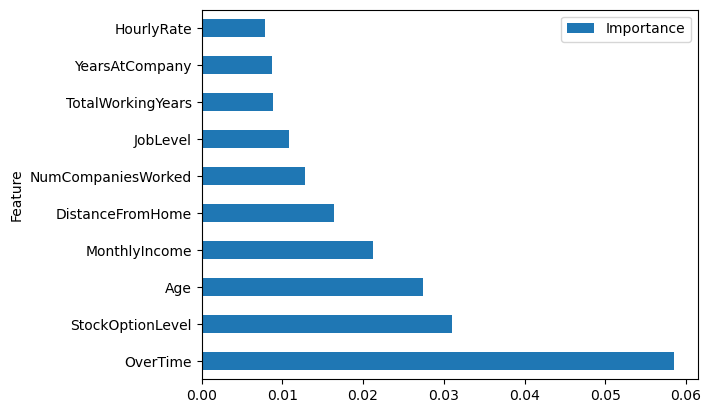

In [22]:
permutation_importance_result.sort_values(by='Importance', ascending=False).head(10).plot(kind='barh',
                                                                                          x='Feature',
                                                                                          y='Importance')

In [23]:
correlation = permutation_importance_result['Importance'].corr(y)
print(f"Correlation between feature importance and target variable: {correlation}")

Correlation between feature importance and target variable: -0.017835004087793736


In [27]:
df.drop(['Gender','PerformanceRating','MonthlyIncome',
           'RelationshipSatisfaction','OverTime','BusinessTravel'], 
          axis=1, inplace=True)

df.columns

Index(['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

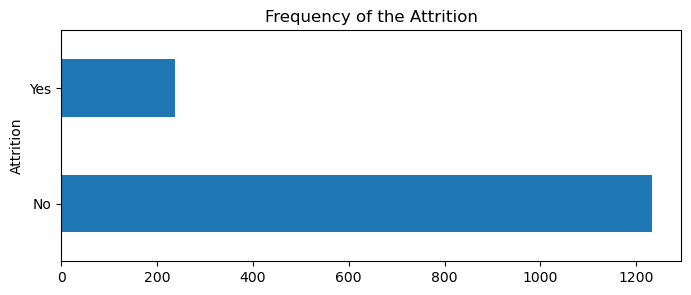

In [29]:
plt.figure(figsize=(8,3))
df['Attrition'].value_counts().plot(kind='barh')
plt.title("Frequency of the Attrition")
plt.show()

In [31]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])
    
df.tail(3)

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1467,27,0,155,1,4,0,1,2,87,3,2,4,2,1,5174,1,20,1,6,0,2,6,2,0,3
1468,49,0,1023,2,2,0,3,3,63,2,2,7,2,1,13243,2,14,0,17,3,3,9,6,0,8
1469,34,0,628,1,8,0,3,2,82,3,2,2,0,1,10228,2,12,0,6,3,1,4,3,1,2


In [32]:
X = df.drop(['Attrition'], axis =1)
y = df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)

(1176, 24)
(294, 24)


In [34]:
xgb_model = XGBClassifier()
xgb_model.fit(x_resample, y_resample)
y_pred = xgb_model.predict(x_test)

print(classification_report(y_test, y_pred))

NameError: name 'x_resample' is not defined